***17.SUPPORT VECTOR MACHINES***

In [2]:
#17.1 Training a Linear Classifier
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()  # call the function to get the dataset object
features = iris.data[:100, :2]
target = iris.target[:100]
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
svc = LinearSVC(C=1.0, max_iter=10000)
model = svc.fit(features_standardized, target)


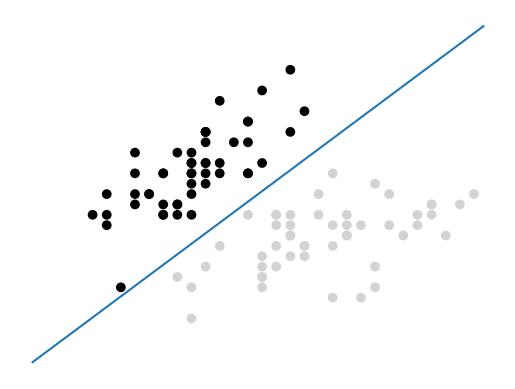

In [3]:
from matplotlib import pyplot as plt
color=["black" if c==0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0],features_standardized[:,1],c=color)
w=svc.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy=a*xx-(svc.intercept_[0]/w[1])

plt.plot(xx,yy)
plt.axis("off"),plt.show();

In [4]:
#17.2 Handling Linearly Inseparable Classes Using Kernels
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
np.random.seed(0)
features=np.random.randn(200,2)
target_xor=xor=np.logical_xor(features[:,0]>0,features[:,1]>0)
target=np.where(target_xor,0,1)
svc=SVC(kernel="rbf",random_state=0,gamma=1,C=1)
model=svc.fit(features,target)

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier):
    cmap=ListedColormap("red","blue")
    xx1,xx2=np.meshgrid(np.arange(-3,3,0.02),np.arange(-3,3,0.02))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,alpha=0.1,cmap=cmap)
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker="+",label=cl)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5968\1463541704.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker="+",label=cl)


Text(0.5, 1.0, 'SVC with Linear Kernel')

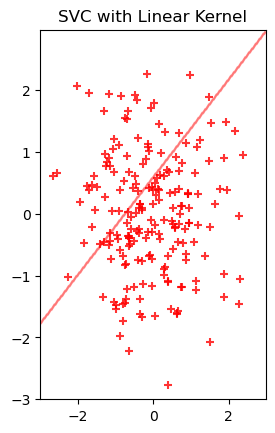

In [8]:
svc_linear=SVC(kernel="linear",random_state=0,C=1)
svc_linear.fit(features,target)
SVC(C=1,cache_size=200,kernel="linear",class_weight="None",random_state=0,verbose=False,probability=False,tol=0.001,max_iter=-1,shrinking=True,gamma="scale")
plt.subplot(1,2,1)
plot_decision_regions(features,target,svc_linear)
plt.title("SVC with Linear Kernel" )

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5968\1463541704.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker="+",label=cl)


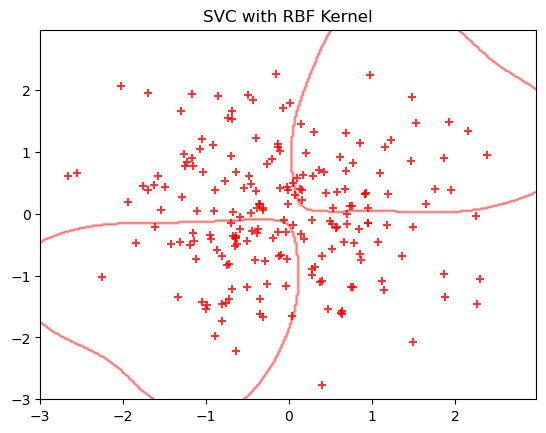

In [9]:
svc=SVC(kernel="rbf",random_state=0,gamma=1,C=1)
svc.fit(features,target)
plot_decision_regions(features,target,svc)
plt.title("SVC with RBF Kernel")
plt.show()

In [1]:
#17.3 Creating Predicted Probabilites
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()  
features = iris.data
target = iris.target
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
svc = SVC(kernel="linear",probability=True,random_state=0)
model = svc.fit(features_standardized, target)
new_observation=[[0.5,0.5,0.5,0.5]]
predicted_class=model.predict(new_observation)

In [2]:
#14.4 Identifying Support Vectors

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()  
features = iris.data[:100, :2]
target = iris.target[:100]
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
svc = SVC(kernel="linear",C=1.0,random_state=0)
model = svc.fit(features_standardized, target)
support_vectors=model.support_vectors_
print("Support Vectors:\n",support_vectors)


Support Vectors:
 [[-0.11120129  0.63190269]
 [-0.73768744 -0.2078351 ]
 [-0.11120129  0.63190269]
 [ 0.04542025  0.84183714]
 [-1.52079513 -1.67737625]
 [-0.89430898 -1.4674418 ]
 [-0.42444437 -0.83763845]
 [-0.11120129 -0.2078351 ]
 [ 0.82852793  0.63190269]
 [ 0.20204178 -0.2078351 ]]


In [3]:
model.support_  # Indices of support vectors

array([20, 25, 31, 36, 41, 57, 59, 84, 85, 88], dtype=int32)

In [6]:
#14.5 Handling Imbalanced Classes
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]
target=np.where((target==0),0,1)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
svc = SVC(kernel="linear",class_weight="balanced",C=1.0,random_state=0)
model = svc.fit(features_standardized, target)